# 1.1「学習済みVGGモデル」を使用する方法

- 本ファイルでは、学習済みのVGGモデルを使用し、未知の画像（ゴールデンレトリバー）を分類します


# 学習目標

1.	PyTorchでImangeNetデータセットでの学習済みモデルをロードできるようになる
2.	VGGモデルについて理解する
3.	入力画像のサイズや色を変換できるようになる



# 事前準備


1. 書籍の指示に従い、make_folders_and_data_downloads.ipynbを実行して、本章で使用するデータをダウンロード


2. PyTorchのインストールページ（ https://pytorch.org/get-started/locally/ ）を参考に、PyTorch1.0をインストール


conda install pytorch-cpu torchvision-cpu -c pytorch

（Windowsで、GPUなしの環境をcondaでインストールする場合）


3. Matplotlibをインストール

conda install -c conda-forge matplotlib 


# パッケージのimportとPyTorchのバージョンを確認

In [1]:
# パッケージのimport
import numpy as np
import json 
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models, transforms



In [2]:
# PyTorchのバージョン確認
print("pyTorch Version: ", torch.__version__)
print("TorchVision Version: ", torchvision.__version__)


pyTorch Version:  1.4.0
TorchVision Version:  0.5.0


# VGG-16の学習済みモデルをロード

In [4]:
# 学習済みのVGG-16モデルをロード
# 初めて実行する際は、学習済みパラメータをダウンロードするため、実行に時間がかかります

# VGG-16モデルのインスタンスを生成
use_pretrained = True #学習済みを使用
net = models.vgg16(pretrained =use_pretrained)
net.eval()


# モデルのネットワーク構成を出力
print(net)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# 入力画像の前処理クラスを作成

In [5]:
# 入力画像の前処理のクラス
class BaseTransform():
    """
    画像のサイズをリサイズし、色を標準化する。

    Attributes
    ----------
    resize : int
        リサイズ先の画像の大きさ。
    mean : (R, G, B)
        各色チャネルの平均値。
    std : (R, G, B)
        各色チャネルの標準偏差。
    """
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean,std)
        ])
    def __call__(self, img):
        return self.base_transform(img)
            
        



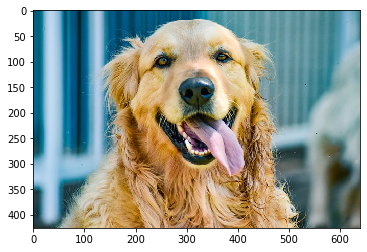

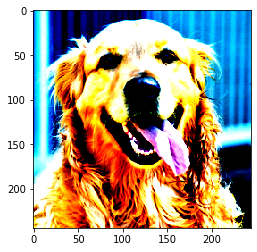

In [6]:
# 画像前処理の動作を確認

# 1. 画像読み込み
image_file_path ='./data/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)

# 2. 元の画像の表示
plt.imshow(img)
plt.show()

# 3. 画像の前処理と処理済み画像の表示
resize = 244
mean = (0.485, 0.456, 0.406)
std = (0.229,0.224,0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)



# (色、高さ、幅)を (高さ、幅、色)に変換し、0-1に値を制限して表示
img_transformed = img_transformed.numpy().transpose((1,2,0))
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()


# 出力結果からラベルを予測する後処理クラスを作成

In [7]:
# ILSVRCのラベル情報をロードし辞意書型変数を生成します
ILSVRC_class_index = json.load(open('./data/imagenet_class_index.json', 'r'))
ILSVRC_class_index


{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [8]:
# 出力結果からラベルを予測する後処理クラス
class ILSVRCPredictor():
    def __init__(self, class_index):
        self.class_index = class_index
        
    def predict_max(self, out):
        maxid= np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)][1]
        return predicted_label_name


# 学習済みVGGモデルで手元の画像を予測

In [9]:
ILSVRC_class_index = json.load(open('./data/imagenet_class_index.json', 'r'))

predictor = ILSVRCPredictor(ILSVRC_class_index)

transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
print(img_transformed.shape)
inputs = img_transformed.unsqueeze_(0)
print(inputs.shape)

out = net(inputs)
result = predictor.predict_max(out)


print('入力予測結果',result)

torch.Size([3, 244, 244])
torch.Size([1, 3, 244, 244])
入力予測結果 golden_retriever


以上